## **import libraries**

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## **Load the dataset**

In [3]:
df = pd.read_csv('Online Retail.csv', encoding='latin-1')


#  **preprocessing technique**

# 1) Data Cleaning


### 1.1 Find the negative values or zero for quantity

In [5]:
print(df [df['Quantity'] < 0])

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

            InvoiceDate  UnitPrice  CustomerID         Country  
141      12/1/2010 9:41      27.50     14527.0

### 1.2 Remove the negative or zero quantities

In [ ]:
df = df[df['Quantity'] > 0]

### 1.3 Detecting the Duplicate

In [6]:
duplicates = df[df.duplicated()]
print("Exact duplicates:\n", duplicates)

Exact duplicates:
        InvoiceNo StockCode                        Description  Quantity  \
517       536409     21866        UNION JACK FLAG LUGGAGE TAG         1   
527       536409     22866      HAND WARMER SCOTTY DOG DESIGN         1   
537       536409     22900    SET 2 TEA TOWELS I LOVE LONDON          1   
539       536409     22111       SCOTTIE DOG HOT WATER BOTTLE         1   
555       536412     22327  ROUND SNACK BOXES SET OF 4 SKULLS         1   
...          ...       ...                                ...       ...   
541675    581538     22068        BLACK PIRATE TREASURE CHEST         1   
541689    581538     23318     BOX OF 6 MINI VINTAGE CRACKERS         1   
541692    581538     22992             REVOLVER WOODEN RULER          1   
541699    581538     22694                       WICKER STAR          1   
541701    581538     23343       JUMBO BAG VINTAGE CHRISTMAS          1   

            InvoiceDate  UnitPrice  CustomerID         Country  
517     12/1/20

### 1.4 Remove the duplicates

In [7]:
df_cleaned = df.drop_duplicates()

###### Detecting Noise

###### Noise can be:

Outliers (extreme values)

Incorrect labels

Random errors or typos

### A. Detect Outliers

In [8]:
from scipy import stats
import numpy as np

# Z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))
outliers = (z_scores > 3).any(axis=1)

print("Outlier rows:\n", outliers.sum())

Outlier rows:
 720


#### Display the outliers

In [9]:
print("Outlier rows:\n",  df[outliers])

Outlier rows:
        InvoiceNo StockCode                          Description  Quantity  \
1814      536544       DOT                       DOTCOM POSTAGE         1   
3041      536592       DOT                       DOTCOM POSTAGE         1   
4287     C536757     84347  ROTATING SILVER ANGELS T-LIGHT HLDR     -9360   
4850      536809     84950       ASSORTED COLOUR T-LIGHT HOLDER      1824   
4945      536830     84077    WORLD WAR 2 GLIDERS ASSTD DESIGNS      2880   
...          ...       ...                                  ...       ...   
540071    581459     22197                       POPCORN HOLDER      1200   
540421    581483     23843          PAPER CRAFT , LITTLE BIRDIE     80995   
540422   C581484     23843          PAPER CRAFT , LITTLE BIRDIE    -80995   
540908    581492       DOT                       DOTCOM POSTAGE         1   
541540    581498       DOT                       DOTCOM POSTAGE         1   

            InvoiceDate  UnitPrice  CustomerID         Count

### B. Detect Typos or Inconsistent Categories

print(df['Country'].value_counts())

### Visualize Noise

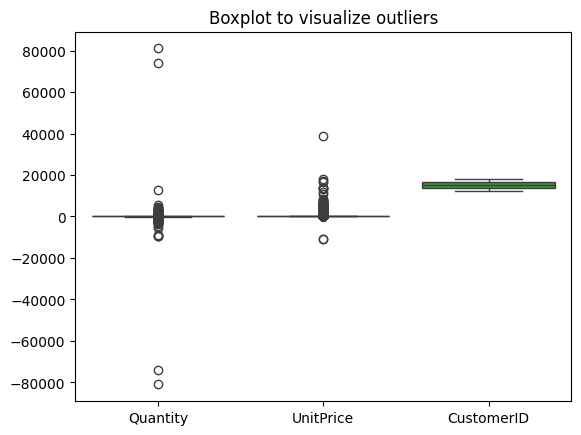

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplot to visualize outliers")
plt.show()


### --- Remove outliers using IQR


In [ ]:
Q1 = df.select_dtypes(include=np.number).quantile(0.25)
Q3 = df.select_dtypes(include=np.number).quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df_cleaned[~((df_cleaned.select_dtypes(include=np.number) < (Q1 - 1.5 * IQR)) | (df_cleaned.select_dtypes(include=np.number) > (Q3 + 1.5 * IQR))).any(axis=1)]

# 2) Handling Missing Values


### 2.1 Identify Missing Values

In [ ]:
# check the any missing values have
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,68
Quantity,0
InvoiceDate,0
UnitPrice,1
CustomerID,17754
Country,1


### 2.2 Drop Missing Data (if appropriate)

In [ ]:
 df = df.dropna(subset=['CustomerID'])

### 2.3 Impute with Mean / Median / Mode

#### Mean Imputation

In [ ]:
df_mean = df.copy()

# Impute numeric columns with mean
df_mean['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
df_mean['UnitPrice'].fillna(df['UnitPrice'].mean(), inplace=True)
df_mean['CustomerID'].fillna(df['CustomerID'].mean(), inplace=True)

# Impute categorical columns with mode (optional)
df_mean['Description'].fillna(df['Description'].mode()[0], inplace=True)
df_mean['Country'].fillna(df['Country'].mode()[0], inplace=True)


/tmp/ipython-input-1875329976.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_mean['Quantity'].fillna(df['Quantity'].mean(), inplace=True)
/tmp/ipython-input-1875329976.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

#### Median Imputation

In [ ]:
df_median = df.copy()

# Impute numeric columns with median
df_median['Quantity'].fillna(df['Quantity'].median(), inplace=True)
df_median['UnitPrice'].fillna(df['UnitPrice'].median(), inplace=True)
df_median['CustomerID'].fillna(df['CustomerID'].median(), inplace=True)

# Impute categorical columns with mode (optional)
df_median['Description'].fillna(df['Description'].mode()[0], inplace=True)
df_median['Country'].fillna(df['Country'].mode()[0], inplace=True)


/tmp/ipython-input-3001406059.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median['Quantity'].fillna(df['Quantity'].median(), inplace=True)
/tmp/ipython-input-3001406059.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

## 2.4 EDA Visualizations

#### Distribution of Numeric Features

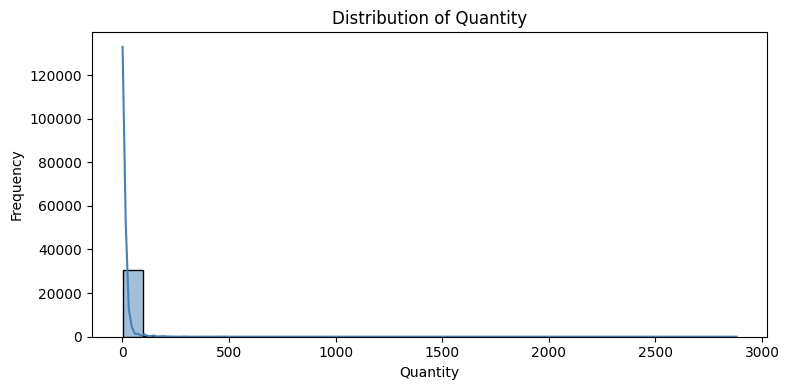

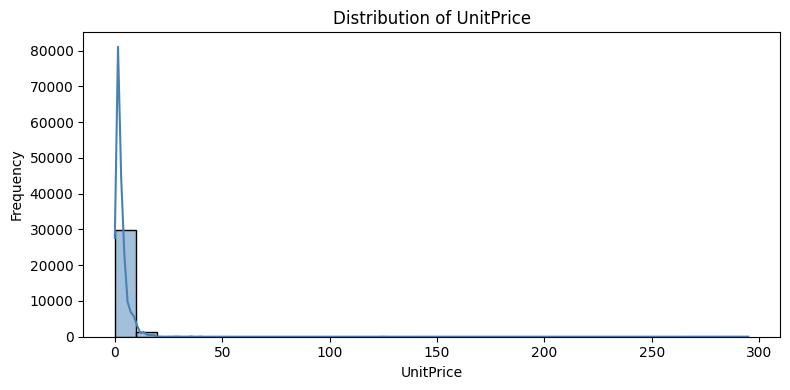

In [ ]:
numeric_cols = ['Quantity', 'UnitPrice']

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


#### Box Plots for Outliers

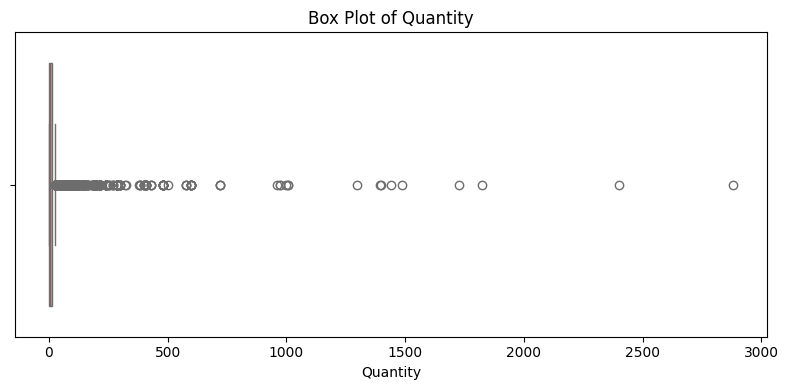

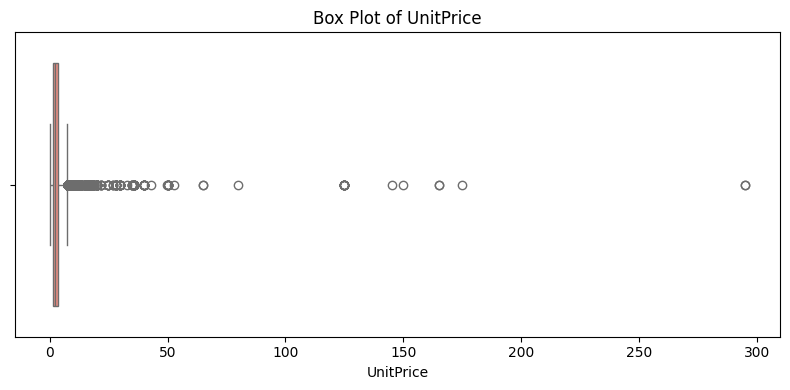

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


#### Correlation Heatmap

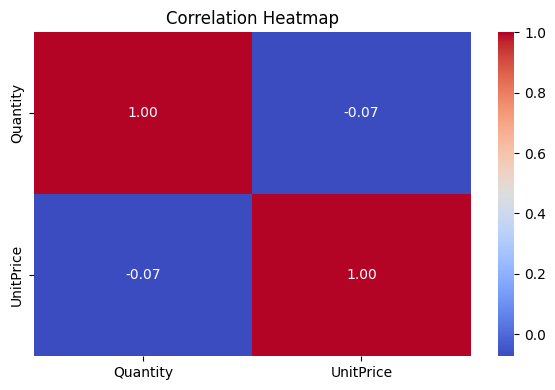

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()


# 3) Encoding Categorical Variables

### 3.1 Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Country_Label'] = label_encoder.fit_transform(df['Country'])


### 3.2 One-Hot Encoding

In [ ]:
df_onehot = pd.get_dummies(df, columns=['Country'], prefix='Country')


### 3.3 Ordinal Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
df['Country_Ordinal'] = ordinal_encoder.fit_transform(df[['Country']])


### 3.5 Target Encoding

In [ ]:
import category_encoders as ce
target_encoder = ce.TargetEncoder(cols=['Country'])
df['Country_Target'] = target_encoder.fit_transform(df['Country'], df['UnitPrice'])

### 3.6 Frequency / Count Encoding

In [ ]:
df['Country_Freq'] = df['Country'].map(df['Country'].value_counts())


### 3.7 Hash Encoding (Feature Hashing)

In [ ]:
hash_encoder = ce.HashingEncoder(cols=['Country'], n_components=8)
df_hash = hash_encoder.fit_transform(df['Country'])


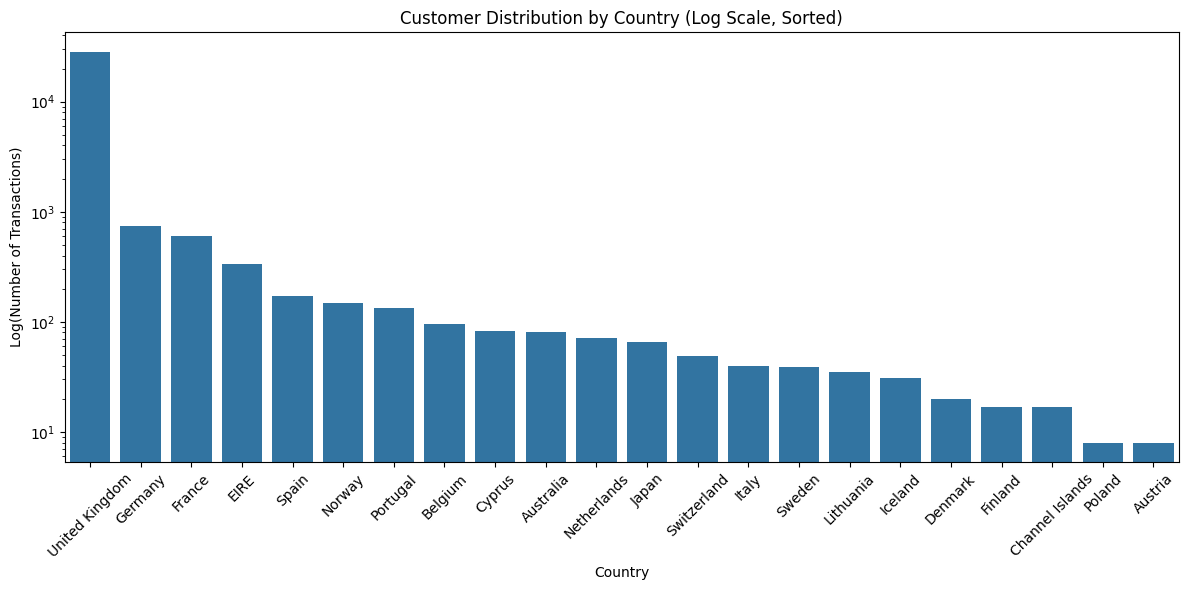

In [ ]:
# Get sorted country order based on actual counts
sorted_countries = df['Country'].value_counts().index

# Plot with sorted order
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Country', order=sorted_countries)
plt.yscale('log')  # Keep log scale if needed
plt.xticks(rotation=45)
plt.title('Customer Distribution by Country (Log Scale, Sorted)')
plt.xlabel('Country')
plt.ylabel('Log(Number of Transactions)')
plt.tight_layout()
plt.show()



# 4) Outlier Detection / Removal


### 4.1 Detection Techniques


####   a) Z-core method

In [ ]:
from scipy.stats import zscore

features = ['Quantity', 'UnitPrice']
df_zscore = df.copy()
for col in features:
    df_zscore[f'{col}_zscore'] = zscore(df_zscore[col])

# Threshold for Z-score
z_thresh = 3
df_zscore_filtered = df_zscore[(df_zscore['Quantity_zscore'].abs() < z_thresh) &
                               (df_zscore['UnitPrice_zscore'].abs() < z_thresh)]

#### b)  IQR Method

In [ ]:
df_iqr = df.copy()
for col in features:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]

### 4.2 Visual Methods

#### * Before Outlier Removal

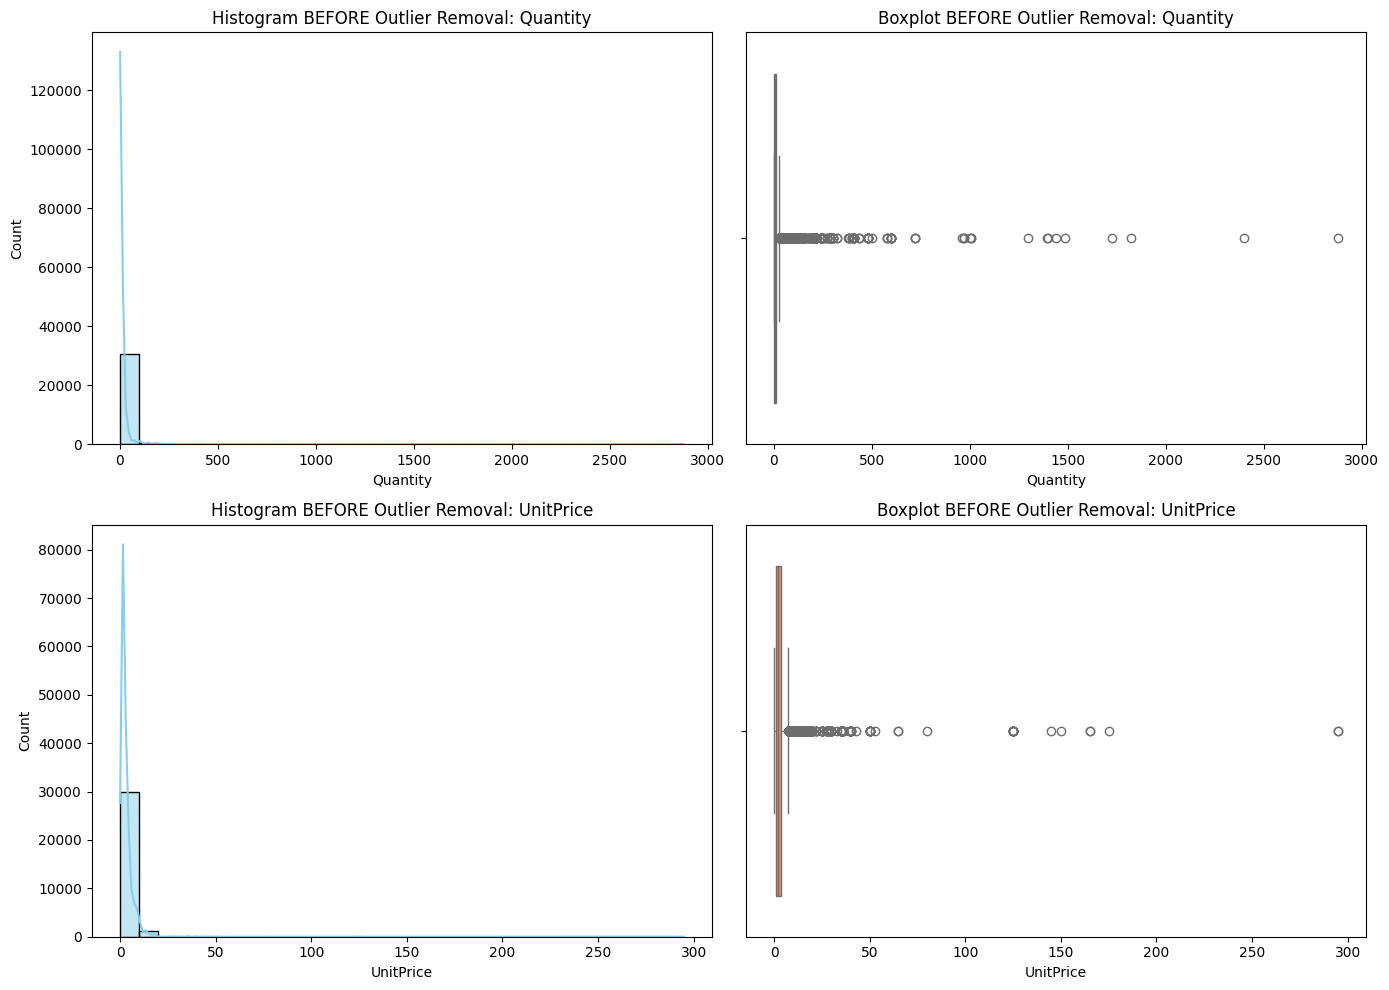

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(features):
    sns.histplot(df[col], bins=30, kde=True, ax=axs[i][0], color='skyblue')
    axs[i][0].set_title(f'Histogram BEFORE Outlier Removal: {col}')

    sns.boxplot(x=df[col], ax=axs[i][1], color='salmon')
    axs[i][1].set_title(f'Boxplot BEFORE Outlier Removal: {col}')
plt.tight_layout()
plt.show()

####  Z-score Filtering

In [ ]:
df_zscore = df.copy()
for col in features:
    df_zscore[f'{col}_zscore'] = zscore(df_zscore[col])
df_zscore_filtered = df_zscore[(df_zscore['Quantity_zscore'].abs() < 3) &
                               (df_zscore['UnitPrice_zscore'].abs() < 3)]

#### IQR Filtering

In [ ]:
df_iqr = df.copy()
for col in features:
    Q1 = df_iqr[col].quantile(0.25)
    Q3 = df_iqr[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_iqr = df_iqr[(df_iqr[col] >= lower_bound) & (df_iqr[col] <= upper_bound)]

#### After Outlier Removal (Z-score)

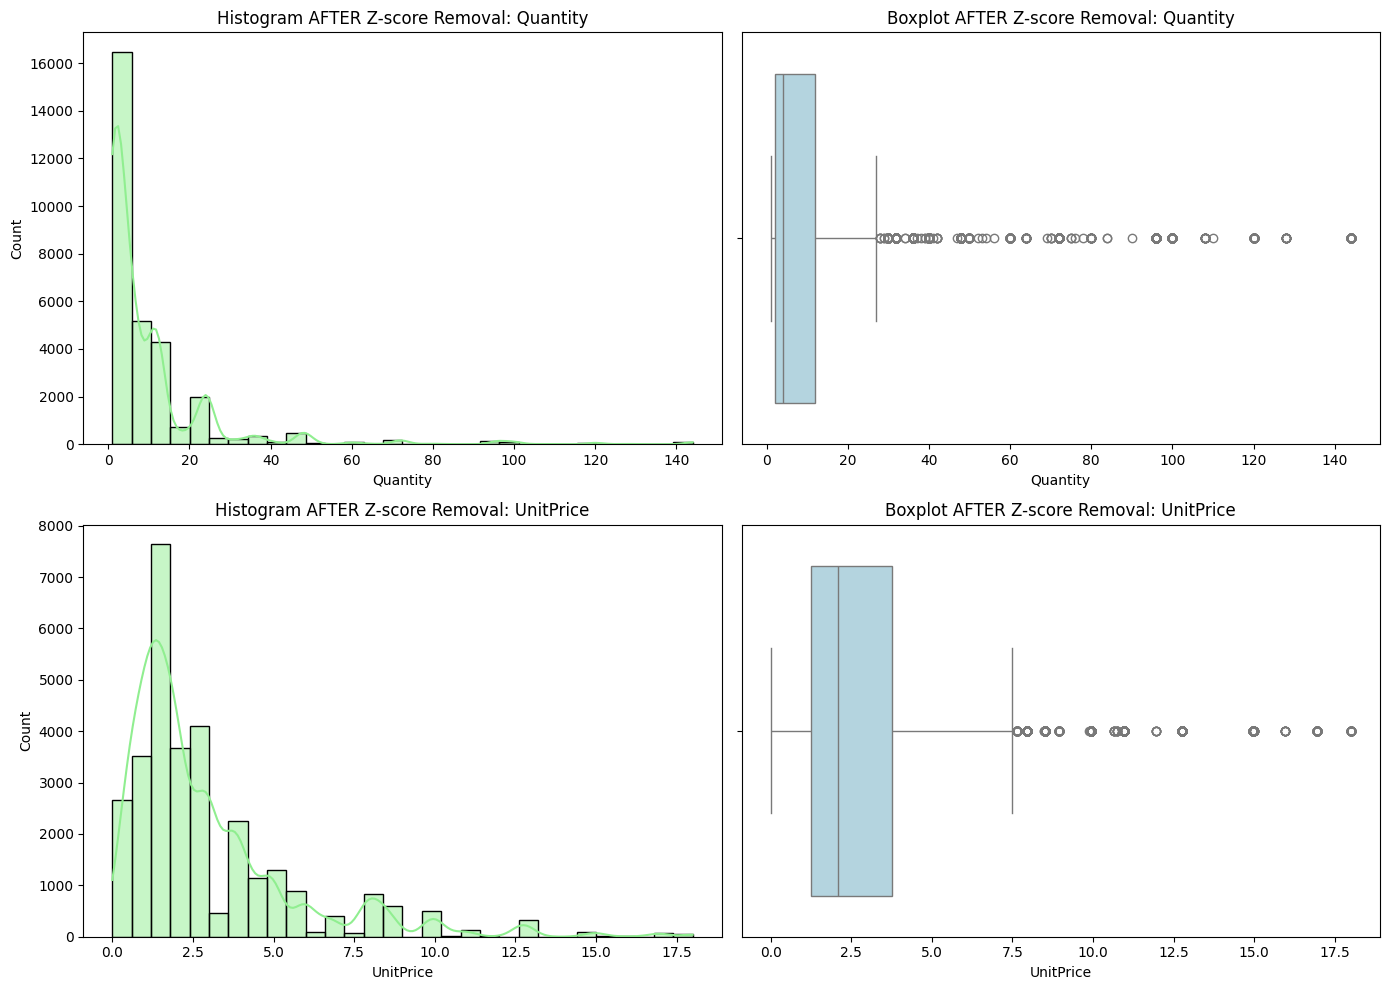

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(features):
    sns.histplot(df_zscore_filtered[col], bins=30, kde=True, ax=axs[i][0], color='lightgreen')
    axs[i][0].set_title(f'Histogram AFTER Z-score Removal: {col}')

    sns.boxplot(x=df_zscore_filtered[col], ax=axs[i][1], color='lightblue')
    axs[i][1].set_title(f'Boxplot AFTER Z-score Removal: {col}')
plt.tight_layout()
plt.show()

#### After Outlier Removal (IQR)

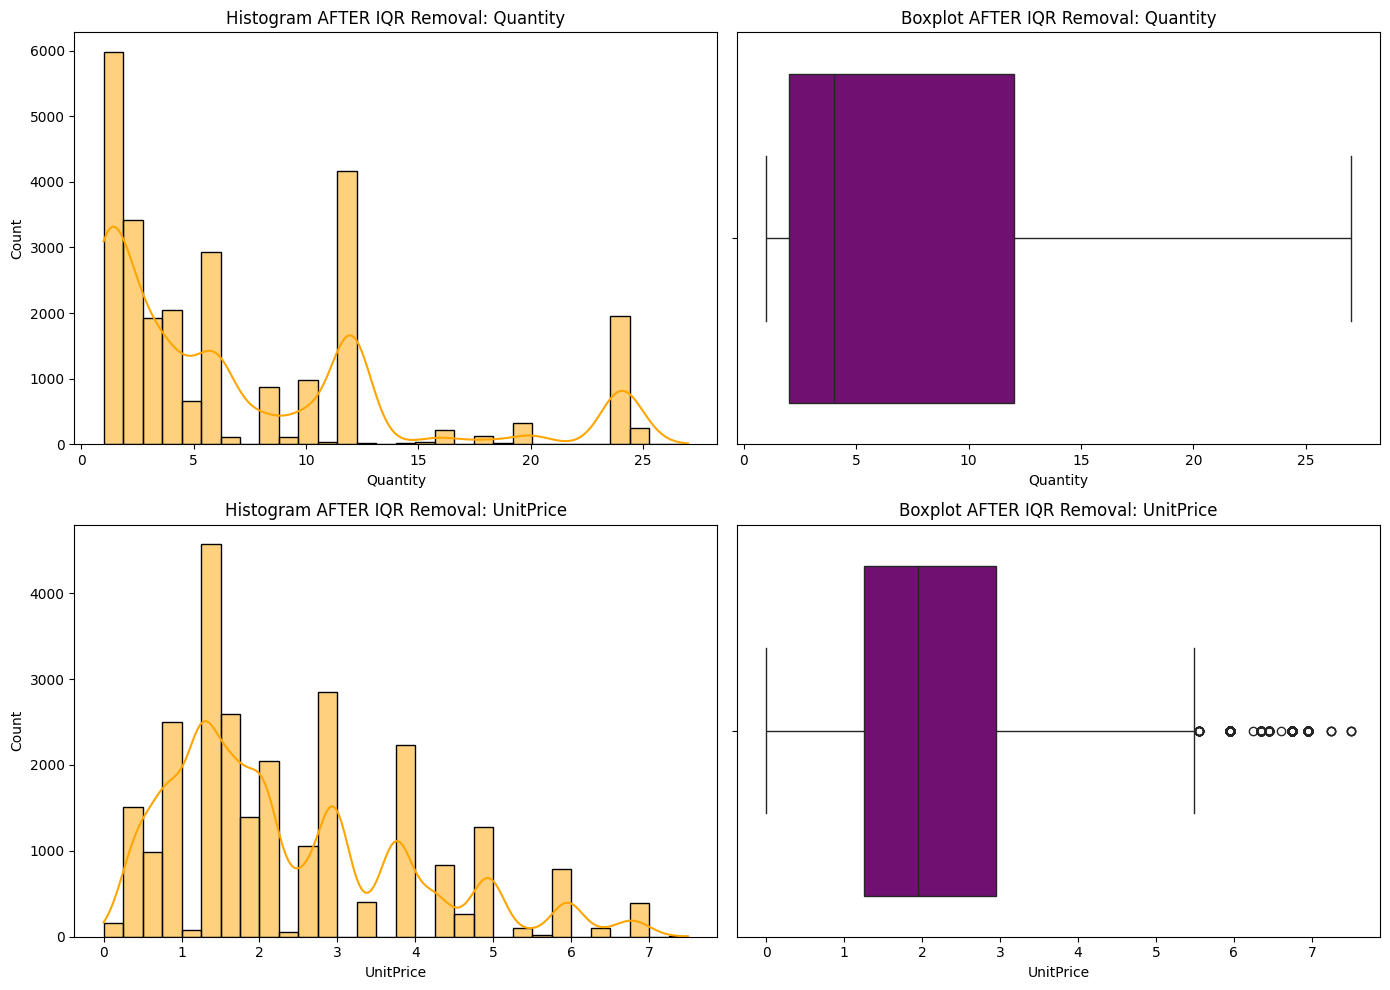

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
for i, col in enumerate(features):
    sns.histplot(df_iqr[col], bins=30, kde=True, ax=axs[i][0], color='orange')
    axs[i][0].set_title(f'Histogram AFTER IQR Removal: {col}')

    sns.boxplot(x=df_iqr[col], ax=axs[i][1], color='purple')
    axs[i][1].set_title(f'Boxplot AFTER IQR Removal: {col}')
plt.tight_layout()
plt.show()

#### Summary

In [ ]:
print("Original dataset size:", df.shape)
print("After Z-score filtering:", df_zscore_filtered.shape)
print("After IQR filtering:", df_iqr.shape)

Original dataset size: (31150, 12)
After Z-score filtering: (30843, 14)
After IQR filtering: (26214, 12)


# 5) Normalization / Scaling


### 5.1 Min-Max Scaling (Normalization)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
rfm_minmax = minmax_scaler.fit_transform(rfm_df)

rfm_minmax_df = pd.DataFrame(rfm_minmax, columns=['Recency', 'Frequency', 'Monetary'])
print("Min-Max Scaled RFM:\n", rfm_minmax_df)


Min-Max Scaled RFM:
    Recency  Frequency  Monetary
0      0.2   0.000000  0.000000
1      0.6   0.666667  0.666667
2      0.0   0.333333  0.166667
3      1.0   1.000000  1.000000
4      0.4   0.000000  0.066667


### 5.2 Standardization (Z-Score Scaling)

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
rfm_standard = standard_scaler.fit_transform(rfm_df)

rfm_standard_df = pd.DataFrame(rfm_standard, columns=['Recency', 'Frequency', 'Monetary'])
print("Standardized RFM:\n", rfm_standard_df)


Standardized RFM:
     Recency  Frequency  Monetary
0 -0.697486  -1.028992 -0.978117
1  0.464991   0.685994  0.737878
2 -1.278724  -0.171499 -0.549119
3  1.627467   1.543487  1.595876
4 -0.116248  -1.028992 -0.806518


### 5.3 Robust Scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
rfm_robust = robust_scaler.fit_transform(rfm_df)

rfm_robust_df = pd.DataFrame(rfm_robust, columns=['Recency', 'Frequency', 'Monetary'])
print("Robust Scaled RFM:\n", rfm_robust_df)


Robust Scaled RFM:
    Recency  Frequency  Monetary
0     -0.5       -0.5 -0.277778
1      0.5        0.5  0.833333
2     -1.0        0.0  0.000000
3      1.5        1.0  1.388889
4      0.0       -0.5 -0.166667


### 5.4 MaxAbs Scaling

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

maxabs_scaler = MaxAbsScaler()
rfm_maxabs = maxabs_scaler.fit_transform(rfm_df)

rfm_maxabs_df = pd.DataFrame(rfm_maxabs, columns=['Recency', 'Frequency', 'Monetary'])
print("MaxAbs Scaled RFM:\n", rfm_maxabs_df)


MaxAbs Scaled RFM:
     Recency  Frequency  Monetary
0  0.333333       0.25     0.250
1  0.666667       0.75     0.750
2  0.166667       0.50     0.375
3  1.000000       1.00     1.000
4  0.500000       0.25     0.300


### Visualization (EDA)

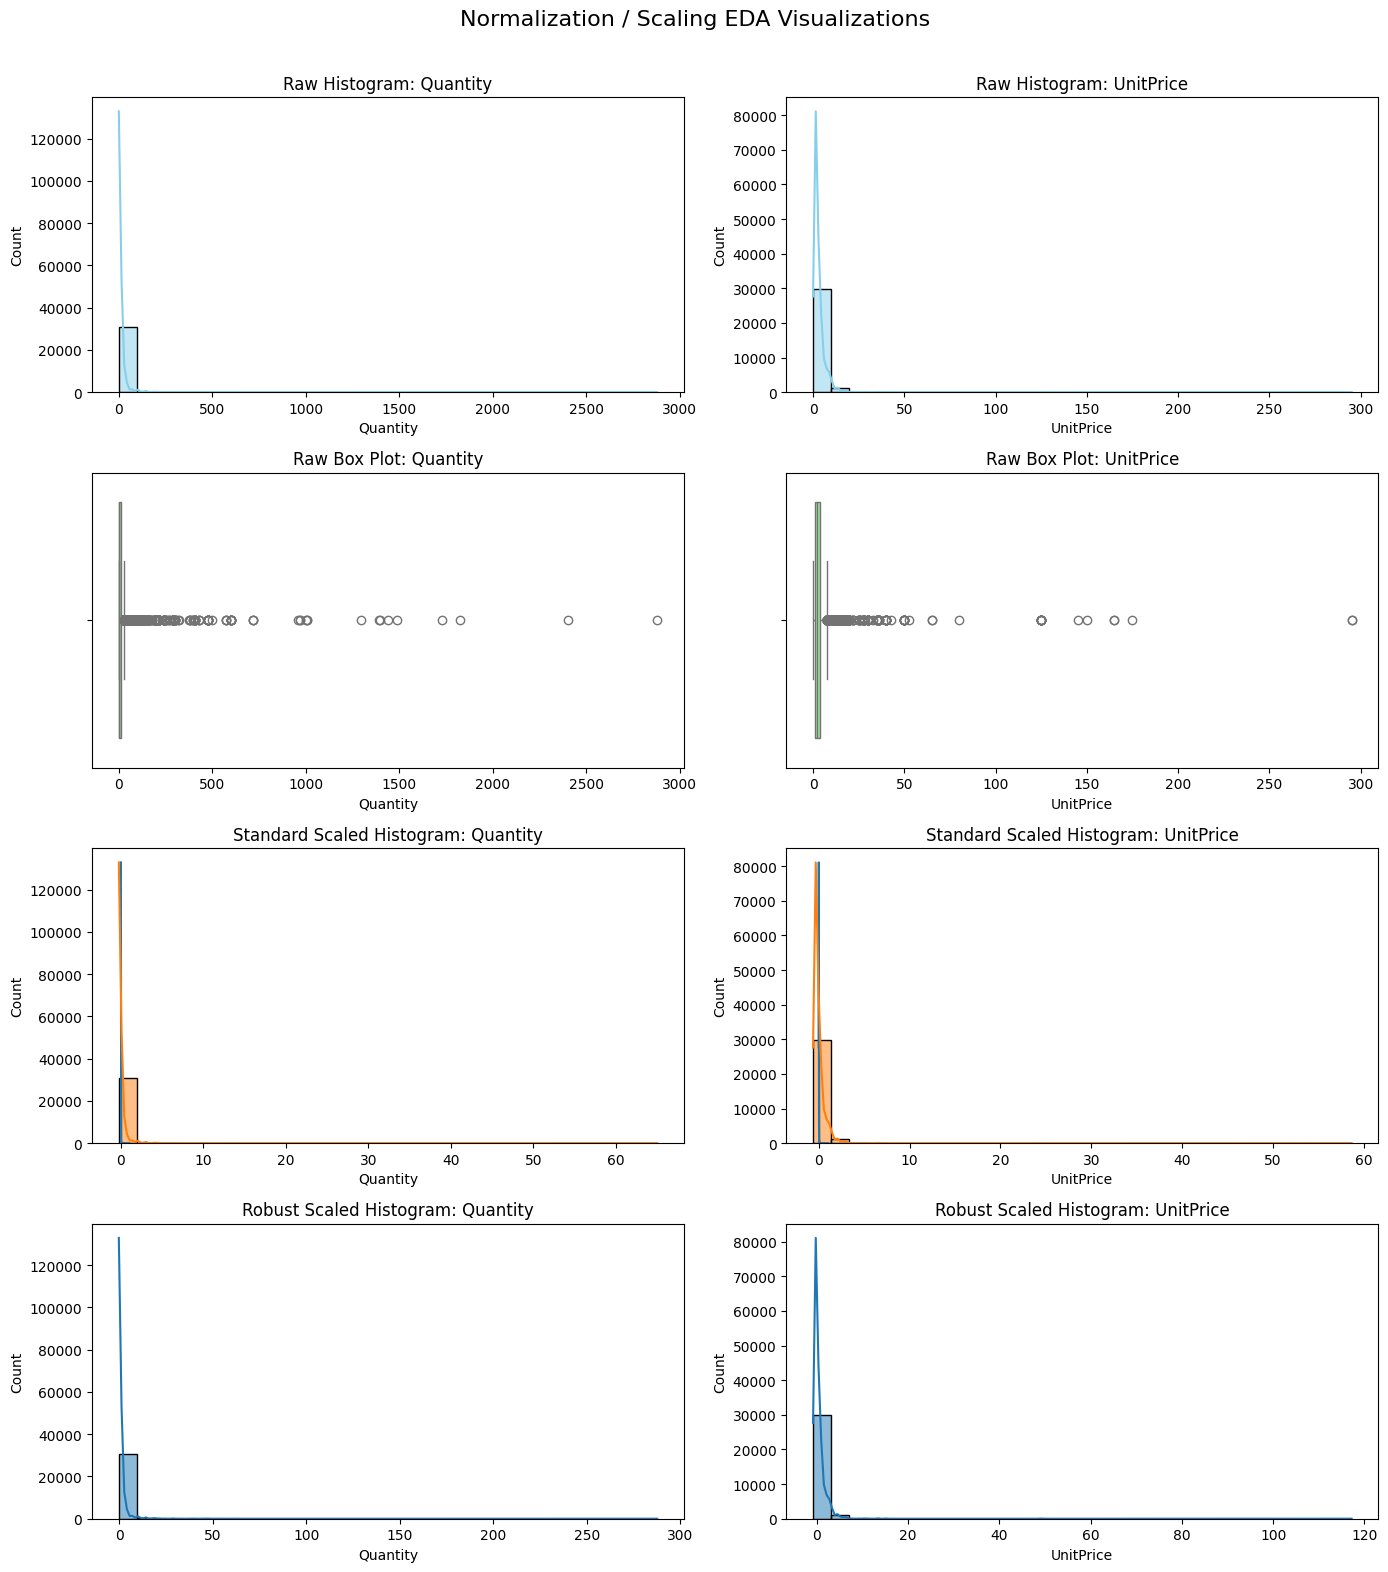

In [ ]:


# Assuming your DataFrame is named df and already cleaned
numeric_cols = ['Quantity', 'UnitPrice']
df_numeric = df[numeric_cols].copy()

# Apply scaling techniques
scalers = {
    'Min-Max': MinMaxScaler(),
    'Standard': StandardScaler(),
    'Robust': RobustScaler()
}

scaled_data = {}
for name, scaler in scalers.items():
    scaled = scaler.fit_transform(df_numeric)
    scaled_data[name] = pd.DataFrame(scaled, columns=numeric_cols)

# plotting
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
fig.suptitle('Normalization / Scaling EDA Visualizations', fontsize=16)

# raw histograms
for i, col in enumerate(numeric_cols):
    sns.histplot(df_numeric[col], ax=axes[0, i], kde=True, bins=30, color='skyblue')
    axes[0, i].set_title(f'Raw Histogram: {col}')

# raw box plots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df_numeric[col], ax=axes[1, i], color='lightgreen')
    axes[1, i].set_title(f'Raw Box Plot: {col}')

# Scaled histograms
for i, (name, data) in enumerate(scaled_data.items()):
    for j, col in enumerate(numeric_cols):
        sns.histplot(data[col], ax=axes[2 + i//2, j], kde=True, bins=30)
        axes[2 + i//2, j].set_title(f'{name} Scaled Histogram: {col}')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


# 6. Feature Engineering



### 6.1 Feature Creation

In [ ]:
customer_df = df.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'Country': 'first'
}).reset_index()



# Aggregate transaction data by CustomerID to create customer-level features:
# - Total quantity purchased
# - Average unit price paid
# - First country recorded (assuming one country per customer)


In [ ]:
customer_df = df_cleaned.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'Country': 'first'
}).reset_index()

# Add total spend
customer_df['TotalSpend'] = customer_df['Quantity'] * customer_df['UnitPrice']
print (customer_df.head())

   CustomerID  Quantity  UnitPrice      Country   TotalSpend
0     12347.0       319   2.890000      Iceland   921.910000
1     12348.0      1254   2.917647      Finland  3658.729412
2     12370.0       967   2.884778       Cyprus  2789.580111
3     12377.0       604   2.106279  Switzerland  1272.192558
4     12383.0       754   1.325135      Belgium   999.151892


### 6.2 Recency, Frequency, Monetary (RFM) Features

In [ ]:
# RFM (Recency, Frequency, Monetary) analysis:
#   Recency: Days since the customer's last purchase (based on latest InvoiceDate)
#   Frequency: Total number of unique invoices (how often the customer bought)
#   Monetary: Total money spent by the customer (UnitPrice × Quantity)
# This helps understand customer behavior for segmentation and marketing strategies

In [ ]:
# Convert 'InvoiceDate' column to datetime format for time-based calculations
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Example: RFM calculation
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days,
    'InvoiceNo': 'nunique',
    'UnitPrice': lambda x: (x * df.loc[x.index, 'Quantity']).sum()
})
rfm.columns = ['Recency', 'Frequency', 'Monetary']


### 6.3 Time-Based Features

In [ ]:

df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceWeekday'] = df['InvoiceDate'].dt.dayofweek


# Extract month and weekday from 'InvoiceDate' to analyze seasonal and weekly purchase patterns:
#   InvoiceMonth : Helps identify monthly trends (e.g., peak sales months)
#   InvoiceWeekday : Shows which days of the week are most active for transactions (0 = Monday, 6 = Sunday)

### 6.4 Clustering-Ready Features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Normalize RFM features using StandardScaler:
#  Scales Recency, Frequency, and Monetary values to have mean = 0 and standard deviation = 1
#  Helps improve performance of machine learning models by removing bias from feature scale differences


## 6.5 EDA Visualization

Interpretation: Low correlation with 'is_dup' (~0) suggests random errors, not patterned. Post-removal, data integrity improves for accurate Frequency counts in RFM.

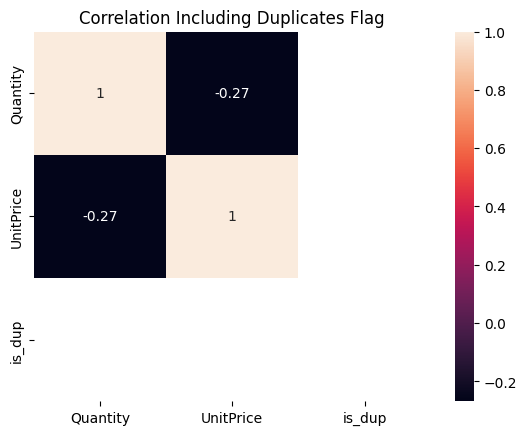

In [ ]:
# Duplicate heatmap (simplified) - Comment: Flag duplicates per row
df['is_dup'] = df.duplicated(keep=False)
sns.heatmap(df[['Quantity', 'UnitPrice', 'is_dup']].head(100).corr(), annot=True)
plt.title('Correlation Including Duplicates Flag')
plt.show()

# 7) Data Transformation

## 7.1 Data Type Conversion

In [ ]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert identifiers to string
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['CustomerID'] = df['CustomerID'].astype(str)


### Normalization (Min-Max Scaling)

##### Used when features have different scales. Brings values into a [0,1] range.

In [ ]:
###
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Example dataset
data = pd.DataFrame({
    'Age': [20, 25, 30, 35, 40],
    'Salary': [2000, 3000, 4000, 5000, 6000]
})

scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

normalized_df = pd.DataFrame(data_normalized, columns=data.columns)
print(normalized_df)


    Age  Salary
0  0.00    0.00
1  0.25    0.25
2  0.50    0.50
3  0.75    0.75
4  1.00    1.00


### Standardization (Z-score Scaling)

##### Centers data around mean 0 with std deviation 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data)

standardized_df = pd.DataFrame(data_standardized, columns=data.columns)
print(standardized_df)


        Age    Salary
0 -1.414214 -1.414214
1 -0.707107 -0.707107
2  0.000000  0.000000
3  0.707107  0.707107
4  1.414214  1.414214


### Log Transformation

##### Helps reduce skewness and handle wide range of values.

In [ ]:
import numpy as np

data['Log_Salary'] = np.log(data['Salary'])
print(data)


   Age  Salary  Log_Salary
0   20    2000    7.600902
1   25    3000    8.006368
2   30    4000    8.294050
3   35    5000    8.517193
4   40    6000    8.699515


## Power Transformation

##### Handles skewed distributions better than log.

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
data_transformed = pt.fit_transform(data[['Salary']])

data['Salary_Transformed'] = data_transformed
print(data)


   Age  Salary  Log_Salary  Salary_Transformed
0   20    2000    7.600902           -1.472958
1   25    3000    8.006368           -0.669775
2   30    4000    8.294050            0.055327
3   35    5000    8.517193            0.727395
4   40    6000    8.699515            1.360012


### EDA Visualization After Transformation

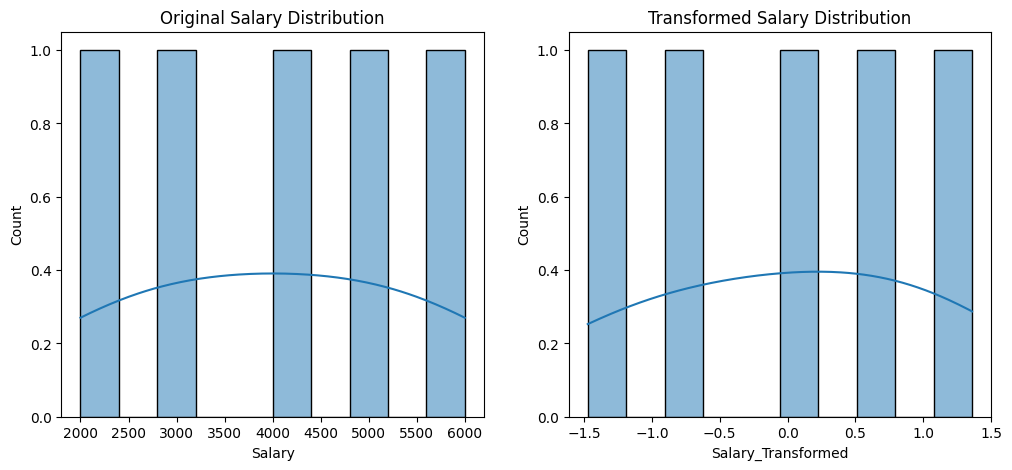

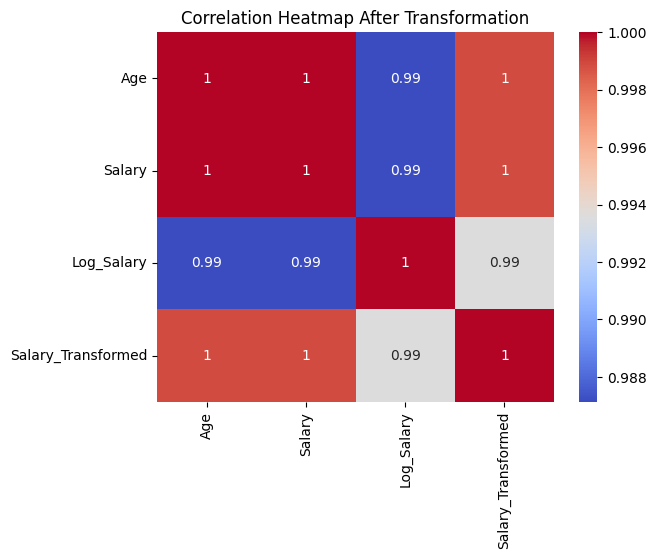

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram before & after transformation
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(data['Salary'], bins=10, ax=ax[0], kde=True)
ax[0].set_title("Original Salary Distribution")

sns.histplot(data['Salary_Transformed'], bins=10, ax=ax[1], kde=True)
ax[1].set_title("Transformed Salary Distribution")

plt.show()

# Correlation Heatmap
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap After Transformation")
plt.show()
